In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D


2022-12-27 17:24:49.703034: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load dataset: 28x28 sized images of handwritten numbers from 0 to 9.
mnist = tf.keras.datasets.mnist

# Get training and test datasets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()


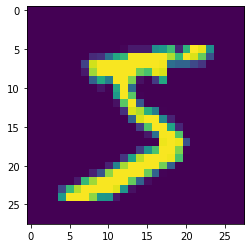

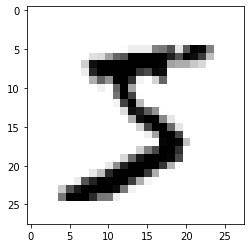

In [3]:
plt.imshow(x_train[0])
plt.show()

plt.imshow(x_train[0], cmap=plt.cm.binary)


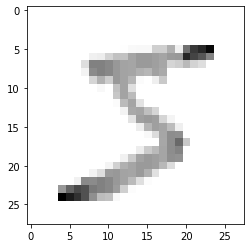

In [4]:
# Normalize data.
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

plt.imshow(x_train[0], cmap=plt.cm.binary)


In [5]:
# Increase dimension by 1 for Convolution kernel operation.
IMG_SIZE = 28

x_train = x_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
x_test = x_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [6]:
model = Sequential()

# 1st Convolution Layer.
model.add(
    Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_uniform",
        input_shape=x_train.shape[1:],
    )
)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolution Layer.
model.add(
    Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_uniform",
        input_shape=x_train.shape[1:],
    )
)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd Convolution Layer.
model.add(
    Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_uniform",
        input_shape=x_train.shape[1:],
    )
)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 1st Fully Connected Layer.
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

# 2nd Fully Connected Layer.
model.add(Dense(32))
model.add(Activation("relu"))

# 3rd Fully Connected Layer.
model.add(Dense(10))  # Must be equal to total number of numbers/classes (0-9).
model.add(Activation("softmax"))


2022-12-27 17:25:03.981352: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [8]:
# Train model.
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")
model.fit(x_train, y_train, epochs=5, validation_split=0.3)


Epoch 1/5
1313/1313 [==============================] - 25s 18ms/step - loss: 0.3059 - accuracy: 0.9045 - val_loss: 0.1221 - val_accuracy: 0.9630
Epoch 2/5
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0980 - accuracy: 0.9695 - val_loss: 0.0795 - val_accuracy: 0.9755
Epoch 3/5
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0691 - accuracy: 0.9791 - val_loss: 0.0792 - val_accuracy: 0.9754
Epoch 4/5
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0529 - accuracy: 0.9837 - val_loss: 0.0740 - val_accuracy: 0.9778
Epoch 5/5
1313/1313 [==============================] - 30s 23ms/step - loss: 0.0428 - accuracy: 0.9865 - val_loss: 0.0784 - val_accuracy: 0.9759


In [9]:
# Test model.
test_loss, test_accuracy = model.evaluate(x_test, y_test)


313/313 [==============================] - 3s 8ms/step - loss: 0.0715 - accuracy: 0.9786


313/313 [==============================] - 3s 8ms/step
Predicted: 2


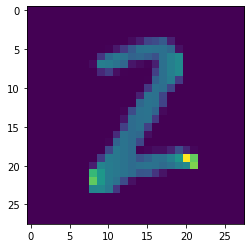

In [10]:
# Check a prediction.
predictions = model.predict([x_test])

print(f"Predicted: {np.argmax(predictions[256])}")
plt.imshow(x_test[256])
